<center>
#CSCI-P556: Applied Machine Learning
#Fall 2018
#Assignment #2
</center>
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

<!-- Your answers goes here -->

In [1]:
import pandas as pd

train1 = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/train_1.csv")
valid1 = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/valid_1.csv")
train2 = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/train_2.csv")
valid2 = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/valid_2.csv")

tt = round((train1['y'].value_counts() / train1.shape[0])*100,0)
print("The % split of Output feature in train_1 is :\n{}".format(tt))
print("\n")
tt = round((valid1['y'].value_counts() / valid1.shape[0])*100,0)
print("The % split of Output feature in valid_1 is :\n{}".format(tt))
print("\n")
tt = round((train2['y'].value_counts() / train2.shape[0])*100,0)
print("The % split of Output feature in train_2 is :\n{}".format(tt))
print("\n")
tt = round((valid2['y'].value_counts() / valid2.shape[0])*100,0)
print("The % split of Output feature in train_2 is :\n{}".format(tt))

The % split of Output feature in train_1 is :
yes    50.0
no     50.0
Name: y, dtype: float64


The % split of Output feature in valid_1 is :
no     50.0
yes    50.0
Name: y, dtype: float64


The % split of Output feature in train_2 is :
no     88.0
yes    12.0
Name: y, dtype: float64


The % split of Output feature in train_2 is :
no     88.0
yes    12.0
Name: y, dtype: float64


    In train_1 and valid_1 has a split of 50-50 with respect to target variable where there is 50% of "yes" and 50% of "no"
    In train_2 and valid_2, there is only 12% of "yes" and the rest are "no" (Imbalanced Data Set)
    
    Also, the size of the datasets (number of rows in train_1 and valid_1) are higher than the ones present in the train_2 and valid_2 respectively
    
    In train_2 there is 0 value for "Duration" feature which will directly correspond to a "no" in the target field. No such case is found in the other 3 data sets

### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
    
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
  
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



    Write your text-based answers here.


    1. Identified numerical featuress using get_numeric_data() function and performed mean normalization for every numerical feature.
        The numerical features are : age, balance, day, duration, campaign, pdays and previous

    2. Rest of the features apart from the numerical ones are categorical features and transformed each categorical variable into dummy variables through one-hot encoding.
        The categorical features are : job, marital, housing, contact, default, education, y, loan, month and poutcome
    
    3. In the given data, pdays variable has -1 and the number of days past since last contact cannot have a negative value. However, 81 % of the values in this feature in the test set has -1 and replacing 81% of the feature with mean/median would not be an advisable thing to do, hence dropping the feature is better and the feature 'previous' would be able to capture some of the variations captured by pdays since they both have a correlation of close to 56%.
    
    Also, the feature poutcome has both "unknown" and "other" as values in addition to "success" and "failure". But since we are dummy encoding or rather 1-hot encoding the feature, it shouldn't pose any problem. Else, we can combine the two levels together if we are proceeding with label encoding.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
y = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/test.csv")
y['flag'] = np.where(y['pdays']==-1,"% of -1 Values in Test data","% of Non -1 Values in Test data")
tt = (y['flag'].value_counts() / y.shape[0])*100
print(tt)
print("\n")
print("The correlation between pdays and previous feature is {} %".format(round(y['pdays'].corr(y['previous'])*100,3)))

% of -1 Values in Test data        81.499502
% of Non -1 Values in Test data    18.500498
Name: flag, dtype: float64


The correlation between pdays and previous feature is 55.357 %


In [3]:
def cleansing_function(X):
     
    del X['pdays']    
   
    cols = X.columns
   
    numeric_cols = list(X._get_numeric_data().columns)
    
    factor_cols = list(set(cols) - set(numeric_cols))
  
    numeric_cols.remove('day')
    
    X[numeric_cols]=(X[numeric_cols]-X[numeric_cols].mean())/X[numeric_cols].std()
    
    binary = []
    rest = []
    for i in range(len(factor_cols)):  
        if((X[factor_cols[i]].nunique())==2):
           
            binary.append(factor_cols[i])
        else:
           
            rest.append(factor_cols[i])



    X = pd.get_dummies(X, columns=binary,drop_first=True)
    X = pd.get_dummies(X, columns=rest)

    return(X)

In [4]:
# PROBLEM 1, TASK 1 CODE GOES HERE
import pandas as pd
import numpy as np
train1 = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/train_1.csv")
valid1 = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/valid_1.csv")
train2 = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/train_2.csv")
valid2 = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/valid_2.csv")
test = pd.read_csv("F:/Indiana University/Fall 2018/Applied Machine Learning/Assignments/Assignment 2/test.csv")


train1 = cleansing_function(train1)
valid1 = cleansing_function(valid1)

train2 = cleansing_function(train2)
valid2 = cleansing_function(valid2)
test = cleansing_function(test)

train1.rename(columns={'y_yes': 'y'}, inplace=True)
valid1.rename(columns={'y_yes': 'y'}, inplace=True)
train2.rename(columns={'y_yes': 'y'}, inplace=True)
valid2.rename(columns={'y_yes': 'y'}, inplace=True)
test.rename(columns={'y_yes': 'y'}, inplace=True)

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


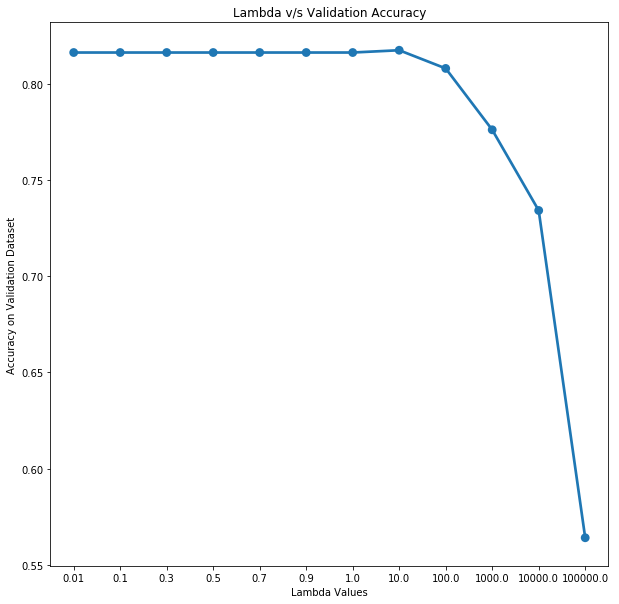

In [5]:
# PROBLEM 1, TASK 2 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import validation_curve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

final_table = pd.DataFrame(columns = ['Model Type','Best Lambda Value','Best Theta Value','Train Accuracy','Validation Accuracy','Test Accuracy'])
final_table['Model Type'] = ['Model A','Model B','Model C']


lambda_vals = [0.01,0.1,0.3,0.5,0.7,0.9,1,10,100,1000,10000,100000]
lambda_vals1 = np.reciprocal(lambda_vals)
cols = list(train1.columns)

cols.remove('y') 

acc_table = pd.DataFrame(columns = ['lambda_vals','Accuracy_Train','Accuracy_Valid'])
acc_table['lambda_vals'] = lambda_vals


plt.figure(figsize=(10, 10))

j = 0
for i in lambda_vals1:
    
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(train1[cols],train1['y'])
    
    # Predict using model
    y_pred1 = lr.predict(train1[cols])
    y_pred = lr.predict(valid1[cols])
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = accuracy_score(train1['y'],y_pred1)
    acc_table.iloc[j,2] = accuracy_score(valid1['y'],y_pred)
    j += 1

acc_table = acc_table.sort_index(by=['Accuracy_Valid'], ascending=False)
acc_table = acc_table.reset_index(drop=True)



import seaborn as sns
ax = sns.pointplot(x=acc_table['lambda_vals'], y=acc_table['Accuracy_Valid'])
ax.set_xlabel("Lambda Values")
ax.set_ylabel("Accuracy on Validation Dataset")
ax.set_title("Lambda v/s Validation Accuracy")

lamda = acc_table.iloc[0,0]
lr = LogisticRegression(penalty = 'l2', C = (1/lamda),random_state = 0)
lr.fit(train1[cols],train1['y'])

y_train = lr.score(train1[cols],train1['y'])
y_valid = lr.score(valid1[cols],valid1['y'])

y_pred_test = lr.predict(test[cols])

final_table.iloc[0,1] = lamda
final_table.iloc[0,2] = '-'
final_table.iloc[0,3] = round(y_train,3)
final_table.iloc[0,4] = round(y_valid,3)
final_table.iloc[0,5] = round(accuracy_score(test['y'],y_pred_test),3)


### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


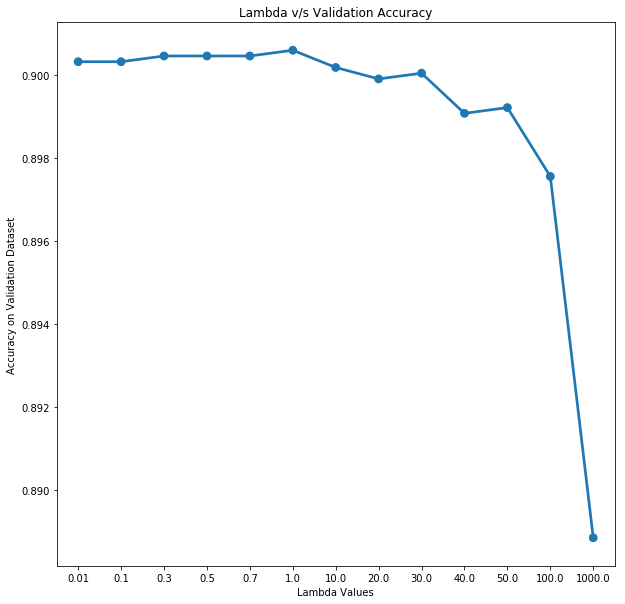

In [6]:
# PROBLEM 1, TASK 3 CODE GOES HERE

lambda_vals = [0.01,0.1,0.3,0.5,0.7,1,10,20,30,40,50,100,1000]#,10000,100000]
lambda_vals1 = np.reciprocal(lambda_vals)
cols = list(train2.columns)
cols.remove('y') 

acc_table = pd.DataFrame(columns = ['lambda_vals','Accuracy_Train','Accuracy_Valid'])
acc_table['lambda_vals'] = lambda_vals


plt.figure(figsize=(10, 10))

j = 0
for i in lambda_vals1:
    
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(train2[cols],train2['y'])
    
    # Predict using model
    y_pred1 = lr.predict(train2[cols])
    y_pred = lr.predict(valid2[cols])
  
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = accuracy_score(train2['y'],y_pred1)
    acc_table.iloc[j,2] = accuracy_score(valid2['y'],y_pred)
    
   
    j += 1

acc_table = acc_table.sort_index(by=['Accuracy_Valid'], ascending=False)
acc_table = acc_table.reset_index(drop=True)



import seaborn as sns
ax = sns.pointplot(x=acc_table['lambda_vals'], y=acc_table['Accuracy_Valid'])
ax.set_xlabel("Lambda Values")
ax.set_ylabel("Accuracy on Validation Dataset")
ax.set_title("Lambda v/s Validation Accuracy")


lamda = acc_table.iloc[0,0]
lr = LogisticRegression(penalty = 'l2', C = (1/lamda),random_state = 0)
lr.fit(train2[cols],train2['y'])

y_train = lr.score(train2[cols],train2['y'])
y_valid = lr.score(valid2[cols],valid2['y'])
y_pred_test = lr.predict(test[cols])

final_table.iloc[1,1] = lamda
final_table.iloc[1,2] = '-'
final_table.iloc[1,3] = round(y_train,3)
final_table.iloc[1,4] = round(y_valid,3)
final_table.iloc[1,5] = round(accuracy_score(test['y'],y_pred_test),3)


### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


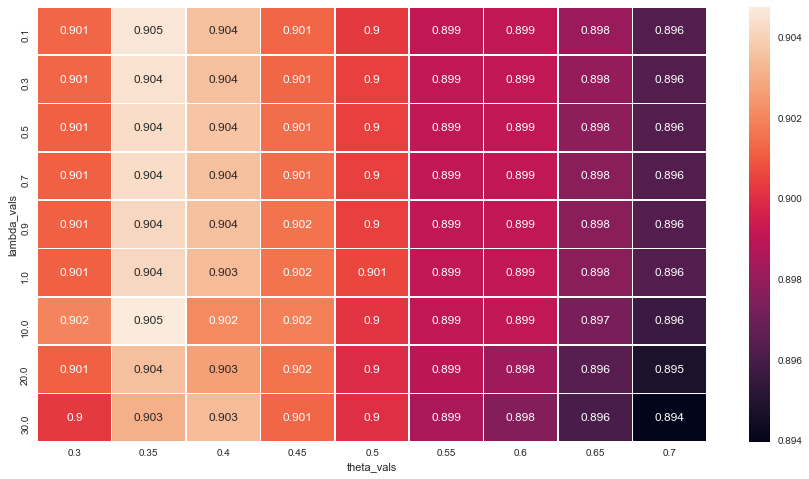

In [7]:
# PROBLEM 1, TASK 4 CODE GOES HERE

lambda_vals = [0.1,0.3,0.5,0.7,0.9,1,10,20,30]#,40,50,100,1000,10000,100000]#,100,1000,10000,100000]
lambda_vals1 = np.reciprocal(lambda_vals)
theta_vals1 = [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]

cols = list(train2.columns)
cols.remove('y') 


acc_table = pd.DataFrame(columns = ['lambda_vals','Accuracy_Train','Accuracy_Valid'])
acc_table['lambda_vals'] = lambda_vals
theta_vals = pd.DataFrame(columns = ['theta_vals'])
theta_vals['theta_vals'] = theta_vals1
acc_table['key'] = 0
theta_vals['key'] = 0
acc_table1 = pd.merge(acc_table,theta_vals,how='outer')
del acc_table1['key']
cols1 = ['lambda_vals','theta_vals','Accuracy_Train','Accuracy_Valid']
acc_table1 = acc_table1[cols1]

X_combined_sepal_standard = np.vstack((train2[cols],valid2[cols]))
Y_combined_sepal = np.hstack((train2['y'], valid2['y']))



j = 0
for i in lambda_vals1:
    
    for k in range(len(theta_vals1)):
    
        lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
        lr.fit(train2[cols],train2['y'])
    
        # Predict using model
        y_pred2 = lr.predict_proba(train2[cols])[:,1]
        y_pred = lr.predict_proba(valid2[cols])[:,1]
        
        y_pred3 = np.where(y_pred2 >= theta_vals1[k],1,0)
        y_pred1 = np.where(y_pred >= theta_vals1[k],1,0)
       
        # Saving accuracy score in table
        acc_table1.iloc[j,2] = accuracy_score(train2['y'],y_pred3)
        acc_table1.iloc[j,3] = accuracy_score(valid2['y'],y_pred1)
        j += 1

 

acc_table1 = acc_table1.sort_index(by=['Accuracy_Valid'], ascending=False)
acc_table1 = acc_table1.reset_index(drop=True)

lamda = acc_table1.iloc[0,0]
theta = acc_table1.iloc[0,1]

lr = LogisticRegression(penalty = 'l2', C = (1/lamda),random_state = 0)
lr.fit(train2[cols],train2['y'])

y_train = lr.predict_proba(train2[cols])[:,1]
y_valid = lr.predict_proba(valid2[cols])[:,1]

y_train = np.where(y_train >= theta,1,0)
y_valid = np.where(y_valid >= theta,1,0)

y_train = accuracy_score(train2['y'],y_train)
y_valid = accuracy_score(valid2['y'],y_valid)

y_pred_test = lr.predict_proba(test[cols])[:,1]
y_pred_test = np.where(y_pred_test >= theta,1,0)

final_table.iloc[2,1] = lamda
final_table.iloc[2,2] = theta
final_table.iloc[2,3] = round(y_train,3)
final_table.iloc[2,4] = round(y_valid,3)
final_table.iloc[2,5] = round(accuracy_score(test['y'],y_pred_test),3)


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

tt = acc_table1.pivot('lambda_vals','theta_vals','Accuracy_Valid')
tt = tt[tt.columns].astype(float)

f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(tt,annot=True,fmt='.3g',linewidths=.5, ax=ax)

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.



In [8]:
final_table

,Model Type,Best Lambda Value,Best Theta Value,Train Accuracy,Validation Accuracy,Test Accuracy
0,Model A,10,-,0.832,0.817,0.757
1,Model B,1,-,0.903,0.901,0.902
2,Model C,10,0.35,0.902,0.905,0.903


**Question 1**
    
    The above table reports the accuracy for all 3 data sets for each of the Model Type and the only Model C has the 'Best Theta Value' because the other 2 models (A and B) had the default threshold of 0.5 only
    
    Scenario 1 - Model A : The dataset is balanced (50-50 % of 1's and 0's of output feature) and the default threshold is 0.5 with lambda value 10. With Accuracy as the metric, Model A results in an accuracy of 75.7 % in the test dataset
    
    Scenario 2 - Model B : The dataset is imbalanced (~ only 12% of 1's and 88% of 0's) and the default threshold is 0.5 with lambda value 1. With Accuracy as the metric, Model B results in an accuracy of 90.2 % in the test dataset
    
    Scenario 3 - Model C : The dataset is imbalanced (~ only 12% of 1's and 88% of 0's) and the threshold is 0.35 with lambda value 10. With Accuracy as the metric, Model C results in an accuracy of 90.3 % in the test dataset
   
    The accuracy in Model B and C are higher than the observed accuracy (for all 3 datasets) in Model A because the data for model B and C are imbalanced with only ~ 12% 1's and the rest 99%  of 0's. Hence accuracy as a metric will always be higher 
    for imbalanced datasets when compared to balanced ones. We will get 90% accuracy even if we predict all the records as 
    "no" or 0.
    Between Model B and C, C is performing slightly better because we have adjusted the threshold that works best for this dataset instead of the standard 0.5 threshold.
    
**Question 2**

    Accuracy is not the correct metric to find the best hyperparameter for imbalanced datasets for the same reason as stated in Question 1. We can use metric such as AUC-ROC which takes into account the Sensitivity (True Positive Rate) and 
    Specificity (1-False Positive Rate) into account. Further, we can also utilize F1-Score as metric which takes into 
    account Precision and Recall which will be useful for a imbalanced data. 
    
    Note: F1-Score does not take True Negatives into account. So we should verify before proceeding with this metric for 
    imbalanced data but AUC-ROC can definitely be utilized

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

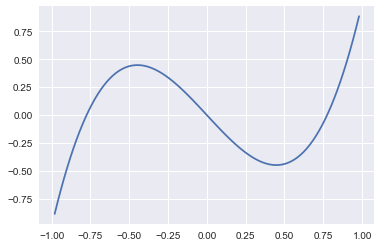

In [9]:
import numpy as np
from scipy.special import legendre
import matplotlib.pyplot as plt
%matplotlib inline

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
  
    w = get_coefficients(degree)

    x_vals = np.linspace(low,high,101,endpoint=False)
    x_vals = x_vals[1:]
    
    y_vals = np.zeros(100)
    for i in range(len(x_vals)):
        t = 0
        for j in range(degree+1):
            t = t + (w[j]* (x_vals[i]**j))
            
        
        y_vals[i] = t
       
       
    plt.plot(x_vals,y_vals)
    
    pass

## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
#visualize_function(4, -1, 1)
#visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [10]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    from sklearn.model_selection import train_test_split
    w = get_coefficients(degree)
    size = n_train + n_test
    x = np.linspace(-1,1,size+1,endpoint=False)
    x = x[1:]
    y = np.zeros(size)
    
    for i in range((size)):
        for j in range(degree+1):
            y[i] += (w[j]*x[i]**j)
        y[i] = y[i] + np.random.normal(0,sigma)
    
    train = pd.DataFrame(columns=['X','Y'])
    train['X'] = x
    train['Y'] = y
    test_size1 = n_test/size
    #print(test_size1)
    X_train, X_test, y_train, y_test = train_test_split(train['X'], train['Y'], test_size=test_size1,random_state=42)
    
   
    X_train = np.array(X_train)
    X_test =  np.array(X_test)
    y_train = np.array(y_train)
    y_test =  np.array(y_test)
    
   
            
    return X_train, y_train, X_test, y_test

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

### Task 3 Question 1

In [11]:
X_train, y_train, X_test, y_test = generate_dataset(10,20,20,0.2)

### Task 3 Question 2

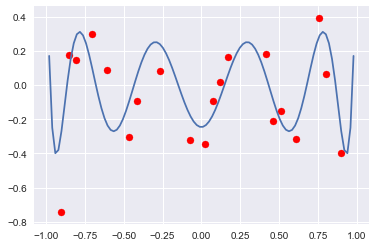

In [12]:
visualize_function(10,-1,1)
plt.scatter(X_train,y_train,color='r')

### Task 3 Question 3

In [13]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Model_Results = pd.DataFrame(columns = ['Model Type','Train Error','Test Error'])
Model_Results['Model Type'] = ['Model A','Model B']

## For Degree 2
poly = PolynomialFeatures(degree= 2)
X_train1 = pd.DataFrame(X_train)
X_test1 = pd.DataFrame(X_test)
X = X_train1.values
X_test = X_test1.values

poly_features = poly.fit_transform(X)
poly_features_test = poly.fit_transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(poly_features,y_train)

y_train_pred = poly_regression.predict(poly_features)
y_test_pred = poly_regression.predict(poly_features_test)

Model_Results.iloc[0,1] = mean_squared_error(y_train, y_train_pred)
Model_Results.iloc[0,2] = mean_squared_error(y_test, y_test_pred)

###############################################################################################################################
## For Degree 10
poly = PolynomialFeatures(degree= 10)
X_train1 = pd.DataFrame(X_train)
X_test1 = pd.DataFrame(X_test)
X = X_train1.values
X_test = X_test1.values

poly_features = poly.fit_transform(X)
poly_features_test = poly.fit_transform(X_test)

poly_regression = LinearRegression()
poly_regression.fit(poly_features,y_train)

y_train_pred = poly_regression.predict(poly_features)
y_test_pred = poly_regression.predict(poly_features_test)

Model_Results.iloc[1,1] = mean_squared_error(y_train, y_train_pred)
Model_Results.iloc[1,2] = mean_squared_error(y_test, y_test_pred)

### Task 3 Question 4

In [14]:
Model_Results

,Model Type,Train Error,Test Error
0,Model A,0.0743888,0.0838441
1,Model B,0.0120156,0.114001


### Task 3 Question 5

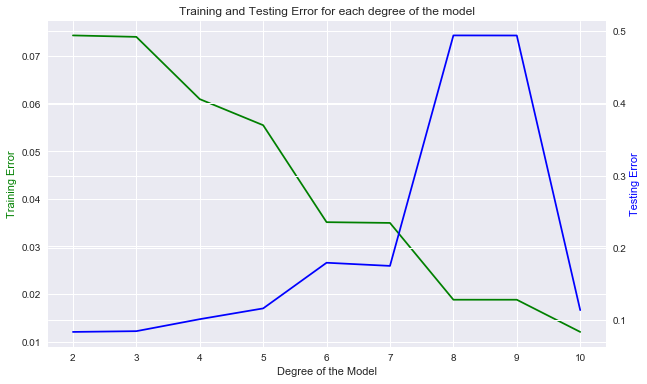

In [15]:
Model_Results = pd.DataFrame(columns = ['Degree of Model','Train Error','Test Error'])
Model_Results['Degree of Model'] = [2,3,4,5,6,7,8,9,10]

for i in range(2,11):
    poly = PolynomialFeatures(degree= i)
    X_train1 = pd.DataFrame(X_train)
    X_test1 = pd.DataFrame(X_test)
    X = X_train1.values
    X_test = X_test1.values

    poly_features = poly.fit_transform(X)
    poly_features_test = poly.fit_transform(X_test)

    poly.fit(X,y_train)
    poly_regression = LinearRegression()
    poly_regression.fit(poly_features,y_train)

    y_train_pred = poly_regression.predict(poly_features)
    y_test_pred = poly_regression.predict(poly_features_test)

    Model_Results.iloc[i-2,1] = mean_squared_error(y_train, y_train_pred)
    Model_Results.iloc[i-2,2] = mean_squared_error(y_test, y_test_pred)


fig,ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.plot(Model_Results['Degree of Model'],Model_Results['Train Error'],color='g')
ax2.plot(Model_Results['Degree of Model'],Model_Results['Test Error'],color='b')

ax1.set_xlabel('Degree of the Model')
ax1.set_ylabel('Training Error', color='g')
ax1.set_title("Training and Testing Error for each degree of the model")
#ax1.set_xlabel('Degree of the Model')
ax2.set_ylabel('Testing Error', color='b')

plt.show()

    The above plots consists of the training and testing error for each degree of the model from Degree 2 to Degree 10.
    
    We can observe that eventhough it isn't smooth, the training error decreases constantly for every increase in the degree of the model.
    
    However, as the degree of the polynomial increases, the testing error seems to increase. This is because, during the training phase, the model learns the training data very well and with higher degree polynomial it almost perfectly fits the training data but since we have introduced random noise, the model fails to generalize (higher degree polynomial models) in the test data and results in more error.
    
    If we need an optimal degree value, we can try picking the value where both the lines intersect.
    
    Note 1: If the random noise generated is very small or very close to 0, then it's almost equivalent to not adding any 
    noise to the targert function in which case Model B will perform better than Model A in both training and test dataset.
    
    Note 2: Sometimes the test error decreases for Degree 9 to Degree 10, it will still be poorly performing in comparison with the train error

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

### Task 4 Question 1

In [16]:
X_train, y_train, X_test, y_test = generate_dataset(45,20,20,0.0)

### Task 4 Question 2

,Model Type,Train Error,Test Error
0,Model A,2.92794e+06,1.00598e+08
1,Model B,23279.6,2.10051e+07


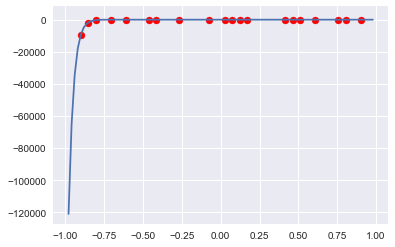

In [17]:
######################################################################################################################################################################
visualize_function(45,-1,1)
plt.scatter(X_train,y_train,color='r')
######################################################################################################################################################################

from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Model_Results = pd.DataFrame(columns = ['Model Type','Train Error','Test Error'])
Model_Results['Model Type'] = ['Model A','Model B']

## For Degree 2
poly = PolynomialFeatures(degree= 2)
X_train1 = pd.DataFrame(X_train)
X_test1 = pd.DataFrame(X_test)
X = X_train1.values
X_test = X_test1.values

poly_features = poly.fit_transform(X)
poly_features_test = poly.fit_transform(X_test)

poly.fit(X,y_train)
poly_regression = LinearRegression()
poly_regression.fit(poly_features,y_train)

y_train_pred = poly_regression.predict(poly_features)
y_test_pred = poly_regression.predict(poly_features_test)

Model_Results.iloc[0,1] = mean_squared_error(y_train, y_train_pred)
Model_Results.iloc[0,2] = mean_squared_error(y_test, y_test_pred)

###############################################################################################################################
## For Degree 10
poly = PolynomialFeatures(degree= 10)
X_train1 = pd.DataFrame(X_train)
X_test1 = pd.DataFrame(X_test)
X = X_train1.values
X_test = X_test1.values

poly_features = poly.fit_transform(X)
poly_features_test = poly.fit_transform(X_test)

poly.fit(X,y_train)
poly_regression = LinearRegression()
poly_regression.fit(poly_features,y_train)

y_train_pred = poly_regression.predict(poly_features)
y_test_pred = poly_regression.predict(poly_features_test)

Model_Results.iloc[1,1] = mean_squared_error(y_train, y_train_pred)
Model_Results.iloc[1,2] = mean_squared_error(y_test, y_test_pred)

######################################################################################################################################################################

Model_Results

### Task 4 Question 3

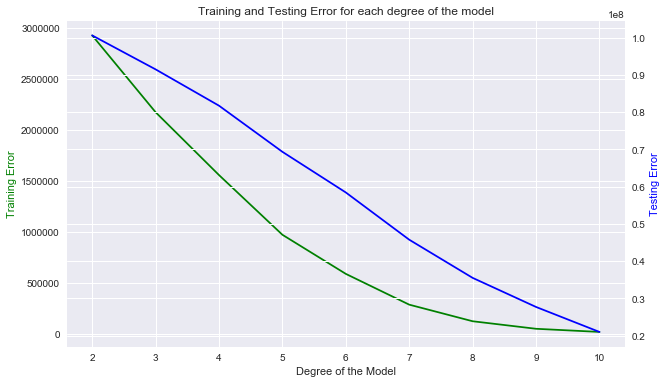

In [18]:
Model_Results = pd.DataFrame(columns = ['Degree of Model','Train Error','Test Error'])
Model_Results['Degree of Model'] = [2,3,4,5,6,7,8,9,10]

for i in range(2,11):
    poly = PolynomialFeatures(degree= i)
    X_train1 = pd.DataFrame(X_train)
    X_test1 = pd.DataFrame(X_test)
    X = X_train1.values
    X_test = X_test1.values

    poly_features = poly.fit_transform(X)
    poly_features_test = poly.fit_transform(X_test)

    poly.fit(X,y_train)
    poly_regression = LinearRegression()
    poly_regression.fit(poly_features,y_train)

    y_train_pred = poly_regression.predict(poly_features)
    y_test_pred = poly_regression.predict(poly_features_test)

    Model_Results.iloc[i-2,1] = mean_squared_error(y_train, y_train_pred)
    Model_Results.iloc[i-2,2] = mean_squared_error(y_test, y_test_pred)

    
fig,ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.plot(Model_Results['Degree of Model'],Model_Results['Train Error'],color='g')
ax2.plot(Model_Results['Degree of Model'],Model_Results['Test Error'],color='b')

ax1.set_xlabel('Degree of the Model')
ax1.set_ylabel('Training Error', color='g')
ax1.set_title("Training and Testing Error for each degree of the model")
#ax2.set_xlabel('Degree of the Model')
ax2.set_ylabel('Testing Error', color='b')
#ax2.set_title("Testing Error for each degree of the model")

plt.show()

     The above plot consists of the training and testing error for each degree of the model from Degree 2 to Degree 10.
    
    We can observe that the error decreases constantly for every increase in the degree of the model in both the training and testing data set
    
    Since we haven't added any error and the functional form of the target variable in the training data is the same as that in the test data (No error added), and given that the data is of the order of 45, higher degree polynomial features 
    should better fit or capture the information in the data in a better way when compared to lower degree polynomial 
    features.
    
   